# Tensorflow Basics

This first notebook will introduce the basics of the tensorflow api, it will cover largerly the same material as the numpy section since I want to showcase the similarities of the two libraries first.  

* why tensorflow?
* introduction to tensors
* tensorflow shapes
* tensorflow slicing
* tensorflow querying
* linear algebra in tensorflow

## Why Tensorflow?

In the previous section on numpy basics our answer was straight forward, why numpy?  Because it's fast and it lets you do vector programming.  But numpy does vector programming on a single computer, you cannot do anything distributed and there is no current support for GPU processing.  That is not the case for pytorch and tensorflow (to name a few).  On a fundamental level there isn't much different between these two libraries and numpy.  And in fact, whenever necessary we will still use numpy to do things.  Tensorflow or pytorch is not always faster than numpy but sometimes they are.  I am choosing tensorflow for this section because it's what I personally know best.  Both libraries are more or less equally good.

That said, the research community does tend to favor pytorch over tensorflow, at least as of this writing.  Perhaps JAX will be the next thing.  Who's to say?  

In any event, tensorflow lets you do vector programming just like numpy except in addition to all this speed and power, higher order tensors are more typical and expected in tensorflow (and pytorch) far less of an after thought.  And the api has more support for this as a consequence.  

That said, the axis argument more or less accomplishes this with numpy, but numpy is more opinionated about which axis to operate over than tensorflow.  That is more of a feeling than anything I want to back up concretely.  And it is purely meant as a juxtaposition.

To really understand tensorflow and the power it brings, we need to understand tensors.  Because without them, tensorflow honestly doesn't make much sense, at least at first.  And even once you start to get used to the syntax, without the mental model of a tensor, you'll completely miss the point of using it.  

So even though some of the writing here will be a straight lift from the numpy section, it's still worth it to go through the same examples because we'll be dealing with a new api.

## Tensors

Tensors are some of the most powerful objects around.  In fact, this book is basically just a "how do I use tensors" most of the time.  The chapter on linear regression?  That's just about tensors.  The chapter on classification?  More applications of tensors.  Much of machine learning is built on tensors.  Specifically, on matrices.  Because I define the matrix in another chapter, I won't go into a ton of detail about what they are, or how to use them.

* scalars
* vectors
* matrices
* order-3 tensors and higher

A scalar is an order zero tensor - because it's just a single number, like say the number `5`.  A vector is a one dimensional collection of numbers representing data or an equation, like: 

$$ \begin{pmatrix}
1  \\
4  \\
7 
\end{pmatrix}
$$


A matrix is a two dimensional collect of numbers representing a system of equations, like:

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
$$


An order three tensor looks like a data cube.  There is no easy way to show such a cube in latex, so you'll have to imagine this to some extent:

$$ A_{1} = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
$$

$$ A_{2} = 
\begin{pmatrix}
3 & 2 & 3 \\
7 & 6 & 6 \\
7 & 2 & 9
\end{pmatrix}
$$

$$ A_{3} = 
\begin{pmatrix}
1 & 2 & 3 \\
7 & 6 & 4 \\
6 & 2 & 19
\end{pmatrix}
$$


Now imagine $A_{1}, A_{2}, A_{3}$ as one object.  This is an order three tensor.  It has three axes - $(i,j,k)$ and you can specify elements across these three axes.  So $(0,0,0) = 1$, $(1,0,0) = 4$, and $(3,0,3) = 6$.  Here the i is the row index, j is the column index and k is the matrix index.  You can also do this for order 4 and up to n, where n is any finite natural number you like.  Why might you want to ever do this in practice?  It turns out there are actually a ton of good reasons.


Here are just two of them:

1. Let's say you want to model multivariate timeseries geospatial data.  This is naturally an order 4 tensor.  The first two dimensions will be each snapshot of multivariate data.  Your third dimension will be that snapshot overtime.  And your forth will be over time and different geographies.  Thinking about it this way is useful for capturing shared weights between time and geographies.  How you model your data matters.  And by ignoring the time or geospatial components of your data, you might lose some important information.

2. You can get a performance boost, statistically speaking.  As this paper shows: https://arxiv.org/pdf/1811.06569.pdf you can get a decent accuracy boost by treating your neural network as a higher order tensor.


## Tensorflow Shapes

Now that you know what a tensor is, the syntax of tensorflow will seem more obvious and straight forward.  Let's start by showing how to represent each of the tensors we've discussed thus far:

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# order 0 tensor
import tensorflow as tf

scalar = tf.constant([0])
print(scalar)

Metal device set to: Apple M1
tf.Tensor([0], shape=(1,), dtype=int32)


2023-06-20 11:49:20.879168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-20 11:49:20.879218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


You may think we've done nothing new here.  But actually we have!  For starters, tensorflow attaches types to anything passed into it.  And it does this _implicitly_.  You never have to name the types.  That by itself would be a feat of engineering prowess.  Let's see what I'm talking about:

In [5]:
scalar.dtype

tf.int32

The `dtype` property tells us what kind of data is in our tensor.  

Since there are mathematical consequences to what's in our tensor, in tensorflow we can only define one type per tensor.  Usually floats are the most flexible.  Unlike in numpy, in tensorflow you can only have one type in your tensor.  Let's see what happens when we try to put a string and an integer together:

In [6]:
tf.constant(["hello", 1])

ValueError: Can't convert Python sequence with mixed types to Tensor.

As you can see, we get an error, because tensorflow doesn't know how to convert the types into one dtype across the entire tensor.  Now let's see what happens if we do integers and floats, does tensorflow handle that case any better?

In [7]:
tf.constant([1, 1.5])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1. , 1.5], dtype=float32)>

It does!  That said, notice the dtype here, tensorflow implicit converts the integer into a float32.  This may seem like a simple thing but it's actually very nuanced!  Tensorflow can have one and exactly one dtype in the tensor and unfortunately, which tensorflow handles this type conversion for you and well, it doesn't always do the best job.  Especially interoperating with pandas and numpy.  For instance, if a neural network we've written expects a float64 and we give it a float32 tensor, the code will raise an error.  

So the semi strict typing in tensorflow can be a pain.  But with pain, in this case comes gain.  The trade off is you get more performance, the ability to use GPUs and distribute your computation, so it's well worth it!  Plus keras is built in for fast prototyping of different network architectures.  In any event, I digress.

Now that we have seen an order 0 tensor and an order 1 tensor, by accident, let's define another order 1 tensor, called a vector:

In [8]:
vector = tf.constant([1, 4, 7])
print(vector)

tf.Tensor([1 4 7], shape=(3,), dtype=int32)


There are a few things to note here:

1. a vector is a collection of scalars.
2. a vector represents a mathematical object, not just an array.

Because this is a mathematical object, we can do things like this:

In [19]:
vector_one = tf.constant([[1, 4, 7]])
vector_two = tf.constant([[2, 4, 6]])

tf.matmul(vector_one, tf.transpose(vector_two))

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[60]], dtype=int32)>

It is important to note the differences between this and what we would do in numpy:

In [20]:
import numpy as np

vector_one = np.array([1, 4, 7])
vector_two = np.array([2, 4, 6])

np.matmul(vector_one, vector_two.T)

60

Notice that in tensorflow we have to explicitly specify that our tensors have two axes, whereas in numpy, by tranposing, numpy is able to figure out that we ought to have two axes to work over, and the numpy matmul does the right thing.  If we tried to do the same thing in tensorflow:

In [21]:
vector_one = tf.constant([1, 4, 7])
vector_two = tf.constant([2, 4, 6])

tf.matmul(vector_one, tf.transpose(vector_two))

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} In[0] and In[1] ndims must be == 2: 1 [Op:MatMul]

As you can see we get an error, this is because tensorflow does less for you and expects you to be more explicit.  Some of this may be a maturity thing, but it's also a design choice to force users to be more explicit about the tensors they want and how you can interact with them.  To some, mostly programmers, who are thinking about axes as strict constructs rather than through the mathematician's conventional lens I'm sure that the latter is more palatable whereas for mathematicians the former is much more preferred.  These are all design choices, but it's important to be aware of the differences!

But I digress

If you've ever taken a linear algebra course the answer that's produced will seem surprising.  That's because technically numpy defaults to an array of scalars for a one dimensional array passed to the `tf.constant` method, rather than a vector.  The difference here is important.

Because algebraic objects are defined in part by the algebraic operators attached to them, this detail matters.  Specifically, here the "multiplication" attached to our vectors is the inner product in this case.  If we want the outer product, which is what most folks who have taken linear algebra would expect, then we need to tell tensorflow that we are working with tensors or order 1 aka vectors and not a collection of scalars.

We do that by using the `reshape` method a powerful tool that will allow us to represent tensors of any order we like.  But first let's start with the basics of turning a collection of scalars into an order 1 tensor, aka a vector:

In [25]:
vector_one = tf.constant([1, 4, 7])
vector_two = tf.constant([2, 4, 6])

vector_one = tf.reshape(vector_one, [3, 1])
vector_two = tf.reshape(vector_two, [1, 3])

tf.matmul(vector_one, vector_two)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 16, 24],
       [14, 28, 42]], dtype=int32)>

The differences in programming with tensorflow versus numpy should start to become more apparent at this point - in general tensorflow tensors don't have many methods defined on the objects themselves.  Instead most of the methods are defined on the tensorflow library object itself.  This modular design allows us to decouple our algorithms from our data structures, which means our data structures can be as small as possible, which allowing us more flexibility over our methods!  In general, I really like this shift.

By reshaping our vectors to the appropriate shapes, we were able to produce a matrix!  This is a general fact of linear algebra - you can get a matrix by applying a matrix multiplication (`matmul`), also known as the outer product, to two vectors.  This "trick" of taking two lower dimensional tensors to create a higher order one will actually work for _any_ tensor we like.  If we want to recover an order 3 tensor we simply need to multiply a matrix by a vector.  That's because the order is additive, by tensor product!  Let's see an example:

In [34]:
a = tf.constant([[5, 1, 3], 
                 [1, 1 , 1], 
                 [1, 2 , 1]])
b = tf.constant([1, 2, 3])
print(tf.tensordot(a, b, axes=0))

tf.Tensor(
[[[ 5 10 15]
  [ 1  2  3]
  [ 3  6  9]]

 [[ 1  2  3]
  [ 1  2  3]
  [ 1  2  3]]

 [[ 1  2  3]
  [ 2  4  6]
  [ 1  2  3]]], shape=(3, 3, 3), dtype=int32)


Here `a` is a matrix, `b` is a tensor.  And by taking the tensor product of the two of them, we recover an order 3 tensor!  Notice we have to provide an axes or the `tensorproduct` method.  This is because a tensor product can be defined on any order.  We've already seen an order 1 tensor product, the inner product.  And we've seen an order 2 tensor product, the outer product.  In higher spaces, we generally refer to the product as simply the tensor product where the order comes from context.  However, please take care to be clear about the shapes of your tensors, otherwise you'll end up doing the _wrong multiplication_.  

I'll leave as an exercise creating tensors of order 4, 5, and 6.  Happy multiplying!

## Tensorflow Slicing

Now that we've seen how to create our tensors the next step is to be able to index into them.  The number of axes that you specify will determine how deep a slice you get back.  For instance, if you are working with an order 3 tensor and you specify one axes, you'll get back a matrix.  If you specify two, you'll get back a vector.  And if you specify all three you'll get back a scalar.  Let's see some examples:

In [37]:
# Getting back a matrix
a = tf.constant([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = tf.constant([1, 2, 3])
order_3_tensor = tf.tensordot(a, b, axes=0)

order_3_tensor[:, :, 0]

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[5, 1, 3],
       [1, 1, 1],
       [1, 2, 1]], dtype=int32)>

The tensorflow syntax for slicing should be somewhat familar if you read the numpy section already, but maybe not.  In vanilla Python you can choose a number of elements by slicing:

In [38]:
listing = list(range(20))

print(listing[:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


The `[:]` just gives back a "slice" that's equal to the whole array, because we didn't specify any start an end.  But if say we just wanted the last 3 elements we can do this:

In [39]:
listing = list(range(20))

print(listing[-3:])

[17, 18, 19]


Of course, we can fully specify the start and end as well:

In [40]:
listing = list(range(20))

print(listing[5:9])

[5, 6, 7, 8]


Of course, that's only for a one dimensional array.  In tensorflow, we are dealing with _many_ dimensions, which is why the syntax looks different.  In the example above we had:

`order_3_tensor[:, :, 0]`

The first axis is selected completely so like with vanilla Python lists, we simply do `[:` for the whole thing.  Next we get the entire second axis so we have: `[:, :`.  And finally, we just want the first "element" along the third axis: `[:, :, 0]`.  At first, this syntax seems confusing to everyone.  But once it clicks, by understanding tensorflow arrays as tensors, then everything in the syntax becomes _obvious_.

Let's move onto our second example.  This time we'll get back just a vector:

In [41]:
# Getting back a vector
a = tf.constant([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = tf.constant([1, 2, 3])
order_3_tensor = tf.tensordot(a, b, axes=0)

order_3_tensor[:, 0, 0]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([5, 1, 1], dtype=int32)>

As you can see, we've specified _two_ axes and therefore, we get back an order 1 tensor.  Now, let's move onto the final example and get back just a scalar:

In [42]:
# Getting back a scalar
a = tf.constant([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = tf.constant([1, 2, 3])
order_3_tensor = tf.tensordot(a, b, axes=0)

order_3_tensor[0, 0, 0]

<tf.Tensor: shape=(), dtype=int32, numpy=5>

Something to notice, the first order 2 slice of our order 3 tensor is just the matrix `a`.  This is because the first element in our vector `b` is a 1.  I'll leave as an exercise, to see if you can write a slice that recovers the first row of matrix a.  Your answer should look like this:

`[5, 1, 3]`

Here is the starter code:

In [43]:
a = tf.constant([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = tf.constant([1, 2, 3])
order_3_tensor = tf.tensordot(a, b, axes=0)

# put in your slices here
#order_3_tensor[, , ]

Now let's talk about a few extra things that happen in tensorflow but not numpy.  We'll start with the tripple dot syntax.  For this we'll work with a tensor of order 4:

In [44]:
a = tf.constant([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = tf.constant([
    [1, 2, 3],
    [ 1, 1 ,1], 
    [ 1, 2 ,1]           
])

order_4_tensor = tf.tensordot(a, b, axes=0)
order_4_tensor.shape

TensorShape([3, 3, 3, 3])

And let's just select elements by the last dimension:

In [51]:
order_4_tensor[..., 0:1]

<tf.Tensor: shape=(3, 3, 3, 1), dtype=int32, numpy=
array([[[[5],
         [5],
         [5]],

        [[1],
         [1],
         [1]],

        [[3],
         [3],
         [3]]],


       [[[1],
         [1],
         [1]],

        [[1],
         [1],
         [1]],

        [[1],
         [1],
         [1]]],


       [[[1],
         [1],
         [1]],

        [[2],
         [2],
         [2]],

        [[1],
         [1],
         [1]]]], dtype=int32)>

Here, we are specifically getting the first row in the last dimension, while perserving the shape of the other three dimensions.  Now suppose we just wanted an order 3 tensor.  We can easily recover that with:

In [52]:
order_4_tensor[..., 0]

<tf.Tensor: shape=(3, 3, 3), dtype=int32, numpy=
array([[[5, 5, 5],
        [1, 1, 1],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [2, 2, 2],
        [1, 1, 1]]], dtype=int32)>

Notice, the data in both tensors is the same, except the extra dimension from the 4 dimensional tensor is preserved when specifying a slice syntax instead of a single index.  We can also select from the front of our tensor:

In [53]:
order_4_tensor[0:1, ...]

<tf.Tensor: shape=(1, 3, 3, 3), dtype=int32, numpy=
array([[[[ 5, 10, 15],
         [ 5,  5,  5],
         [ 5, 10,  5]],

        [[ 1,  2,  3],
         [ 1,  1,  1],
         [ 1,  2,  1]],

        [[ 3,  6,  9],
         [ 3,  3,  3],
         [ 3,  6,  3]]]], dtype=int32)>

In [54]:
order_4_tensor[0, ...]

<tf.Tensor: shape=(3, 3, 3), dtype=int32, numpy=
array([[[ 5, 10, 15],
        [ 5,  5,  5],
        [ 5, 10,  5]],

       [[ 1,  2,  3],
        [ 1,  1,  1],
        [ 1,  2,  1]],

       [[ 3,  6,  9],
        [ 3,  3,  3],
        [ 3,  6,  3]]], dtype=int32)>

Functionally, the tripple dots makes the last dimension of our tensor the 'index' dimension which convientently let's us slice into the tensor easily while preserving our overall dimensionality.

Note: there is more than one way to recover the row in question.

## Tensorflow Querying

So far we've looked at the mathematical advantages of tensorflow over vanilla Python.  There was another claim I made, that tensorflow is blazing fast.  Let's verify that claim and go further than we did last time.  Now we can benchmark tensorflow against numpy to see how the two of them stack up as well!

Let's see some examples:

In [55]:
%timeit array = np.random.normal(0, 1, size=10000)

151 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [56]:
%timeit array = tf.random.normal([10000], mean=0, stddev=1)

253 µs ± 87 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
import random
def generate_array():
    return [random.gauss(0, 1) for _ in range(10000)]

%timeit generate_array()

2.72 ms ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


As you can see, numpy and tensorflow are an _order_ of magnitude faster.  There are a lot of examples similar to this.  We'll look at just a few more:

In [60]:
array_one = np.random.normal(0, 1, size=10000)
array_two = np.random.normal(0, 1, size=10000)

In [61]:
%timeit array_one + array_two

2.67 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [77]:
array_one = tf.random.normal([10000], mean=0, stddev=1)
array_two = tf.random.normal([10000], mean=0, stddev=1)

In [78]:
%timeit tf.add(array_one, array_two)

47.7 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [79]:
%timeit array_one + array_two

46.6 µs ± 271 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [64]:
def add_array_elements(array_one, array_two):
    return [array_one[index] + array_two[index]
            for index in range(len(array_one))]

array_one = generate_array()
array_two = generate_array()

In [65]:
%timeit add_array_elements(array_one, array_two)

412 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


This time, numpy is actually the clear winner.  With a much lower average and a much tighter bound, clearly numpy is better at adding arrays!  Granted, this is on a CPU.  If we were on a GPU it's likely that tensorflow would be faster.  But given how fast numpy is at adding vectors, I'm not sure it would be _much_ faster.  Notice there is more than one way to add tensors in tensorflow. 

You can also do multiplication just as easily:

In [66]:
array_one = np.random.normal(0, 1, size=10000)
array_two = np.random.normal(0, 1, size=10000)

In [67]:
%timeit array_one * array_two

2.74 µs ± 42.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [74]:
array_one = tf.random.normal([10000], mean=0, stddev=1)
array_two = tf.random.normal([10000], mean=0, stddev=1)

In [75]:
%timeit array_one * array_two

46.1 µs ± 223 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [76]:
%timeit tf.multiply(array_one, array_two)

43.7 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [70]:
def multiply_array_elements(array_one, array_two):
    return [array_one[index] * array_two[index]
            for index in range(len(array_one))]

array_one = generate_array()
array_two = generate_array()

In [71]:
%timeit multiply_array_elements(array_one, array_two)

415 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


As you can see the orders of magnitude are similar for multiplication as they were for addition.  This is actually a _much_ bigger deal than may be obvious from these two examples.  All of linear algebra relies on these two operations.  That means linear regression, logistic regression, neural networks are all around 100 times faster implemented with numpy as compared to vanilla Python.  Of course, that is a blanket statement.  There are things you can do to make vanilla Python move faster.  And you can implement numpy poorly.  So this is a statement that needs to be taken with a grain of salt.  But still, numpy is faster for the things that matter to folks working in statistics and machine learning.  And that's just a fact.

So even though numpy is the clear winner on these fundamental operations, some things to consider - this was done on CPU not GPU or TPU.  Second, this computation was not distributed.  For really big or long running work loads or really big data, tensorflow is going to do well.  But there is an important lesson here - you need to take care to optimize your code.  Unoptimized tensorflow code will actually be slower than numpy!  So it all comes down to the details.  

It's also important to note, that writing really performant tensorflow code may be pretty _ugly_ (as far as programmer snooty-ness goes).  So make sure that you are aware of the trade off and making sure your team can support the code you are writing.  If they can't, careful documentation can help.  But building the skills of your team to be able to support your work is paramount!  If your code is performant but unmaintainable by others, who cares?  

Of course, even if tensorflow ends up being slower because of the trade offs you have to make, it still comes with a ton of nice to have stuff by way of keras and other things.  So, no need to throw the baby out with the bath water even if you could get more performance out of numpy!  

Tensorflow, even if not always the fastest, is still very fast.  Since tensorflow is _so fast_.  It can actually be used as a minimal in memory database.  Here we'll go over some of the basics for querying data in tensorflow.  Some of the syntax here will be confusing at first, but with time and practice it will become clear.

Let's look at a simple example of selecting a specific section of elements:

In [3]:
array = tf.random.normal([10000], mean=0, stddev=1)

len(array[array > 0.5])/len(array)

0.309

I did a little stylizing here returning the percentage of the array over 0.5.  But basically this shows us the querying syntax.  This syntax is definitely _not_ obvious on first blush.  That said, once you get used to it, it's pretty powerful.  What's going on here is the following:

the inner bit of syntax: `array > 0.5` is a boolean statement.  That is, implicitly every element of the array is checked for the condition, element of array greater than 0.5.  If the element meets the condition `True` is returned, otherwise False is returned.  



Then a boolean array is passed to the array as a slice:

`array[boolean statement goes here]`.

Then indices where the index in question is `True` is returned.  Any indices that return `False` are ommited.  In this way, you can "semantically slice" your array.  To make this concrete, let's look at just the result of `array > 05`:

In [4]:
array > 0.5

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([False, False, False, ..., False,  True,  True])>

As you can see, this is just an array of boolean values.  And if we counted up the number of times that resultant array has the value `True` it would equal the size of the semantically sliced array: `array[array > 0.5]`:

In [19]:
array = tf.random.normal([10000], mean=0, stddev=1)
filtered_array = (array > 0.5)
filtered_array = tf.cast(filtered_array, tf.int32)
print(tf.reduce_sum(filtered_array))
print(len(array[array > 0.5]))

tf.Tensor(3051, shape=(), dtype=int32)
3051


The way I counted the number of `True`'s may be confusing, so let's look at that: 

By casting the `True`'s and `False`'s as type `int` we turn the `True`'s into `1`'s and the `False`'s into `0`'s. 

There are some very useful primitives in this example:

* tf.cast
* tf.reduce_sum

Because tensorflow tensors need to always have the same type across all elements, if you are combining two tensors with different types being able to cast is how you'll turn tensors of one type into another.  It's important to to take care when type casting!  Inherently type casting is a lossy process.  So if you cast from floats to integers or even from floats of one precision to floats of a different precision you will likely looks information.  Technically the same is true for integers but the chances of needing a 32 bit integer are usually quiet small.  

As far as reduce_sum goes, there is a lot of utility here!  Many architectures make use of reduce_sum because it lets you sum across whatever axis you like.  

Let's look at a few more examples of tf.reduce_sum:

In [17]:
a = tf.constant([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = tf.constant([
    [1, 2, 3],
    [ 1, 1 ,1], 
    [ 1, 2 ,1]           
])

tensor = tf.tensordot(a, b, axes=0)

print("sum across the zeroth axis")
print(tf.reduce_sum(tensor, axis=0))
print()
print()
print("sum across the 1st axis")
print(tf.reduce_sum(tensor, axis=1))
print()
print()
print("sum across the 2nd axis")
print(tf.reduce_sum(tensor, axis=2))
print()
print()
print("sum across the 3rd axis")
print(tf.reduce_sum(tensor, axis=3))

sum across the zeroth axis
tf.Tensor(
[[[ 7 14 21]
  [ 7  7  7]
  [ 7 14  7]]

 [[ 4  8 12]
  [ 4  4  4]
  [ 4  8  4]]

 [[ 5 10 15]
  [ 5  5  5]
  [ 5 10  5]]], shape=(3, 3, 3), dtype=int32)


sum across the 1st axis
tf.Tensor(
[[[ 9 18 27]
  [ 9  9  9]
  [ 9 18  9]]

 [[ 3  6  9]
  [ 3  3  3]
  [ 3  6  3]]

 [[ 4  8 12]
  [ 4  4  4]
  [ 4  8  4]]], shape=(3, 3, 3), dtype=int32)


sum across the 2nd axis
tf.Tensor(
[[[15 25 25]
  [ 3  5  5]
  [ 9 15 15]]

 [[ 3  5  5]
  [ 3  5  5]
  [ 3  5  5]]

 [[ 3  5  5]
  [ 6 10 10]
  [ 3  5  5]]], shape=(3, 3, 3), dtype=int32)


sum across the 3rd axis
tf.Tensor(
[[[30 15 20]
  [ 6  3  4]
  [18  9 12]]

 [[ 6  3  4]
  [ 6  3  4]
  [ 6  3  4]]

 [[ 6  3  4]
  [12  6  8]
  [ 6  3  4]]], shape=(3, 3, 3), dtype=int32)


As you can see by default reduce sum reduces the dimension of the tensor by 1 as it sums across the axis of interest.  This can be very powerful if we have an 'index' axis to keep track of our tensors, like say a product or time axis.  We can actually reduce along as many axes as we like:

In [18]:
a = tf.constant([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = tf.constant([
    [1, 2, 3],
    [ 1, 1 ,1], 
    [ 1, 2 ,1]           
])

tensor = tf.tensordot(a, b, axes=0)

print("sum across the zeroth and 1st axis")
print(tf.reduce_sum(tensor, axis=[0, 1]))
print()
print()
print("sum across the 0th, 1st and 2nd axis")
print(tf.reduce_sum(tensor, axis=[0, 1, 2]))
print()
print()
print("sum across the 1st, 0th and 2nd axis")
print(tf.reduce_sum(tensor, axis=[1,0,2]))
print()
print()
print("sum across all axes")
print(tf.reduce_sum(tensor, axis=[0,1,2,3]))

sum across the zeroth and 1st axis
tf.Tensor(
[[16 32 48]
 [16 16 16]
 [16 32 16]], shape=(3, 3), dtype=int32)


sum across the 0th, 1st and 2nd axis
tf.Tensor([48 80 80], shape=(3,), dtype=int32)


sum across the 1st, 0th and 2nd axis
tf.Tensor([48 80 80], shape=(3,), dtype=int32)


sum across all axes
tf.Tensor(208, shape=(), dtype=int32)


Notice that the sum is regardless of which axis we start with because addition is commutative for the integer numbers.

We've show a simple example of how to query with tensorflow, but these examples can be as sophisticated as they are in any SQL dialect.  Next let's look at a complex querying statement - one with two statements:

Here we will select all the elements between 0.5 and 0.7 only

In [20]:
array = tf.random.normal([10000], mean=0, stddev=1)

result = array[
    (array > 0.5) &
    (array < 0.7)
]
len(result)/len(array)

0.0632

Notice here the use of the `&` symbol.  This stands for 'and' when dealing with boolean statements.  Specifically those where both numbers are represented as binary.  Therefore we refer to `&` as `binary and`.  

The way this operator works is as follows:

1 `&` 1 = 1

1 `&` 0 = 0

0 `&` 1 = 0

If we have longer binary numbers, then we simply apply the `&` element wise across the "string" of binary numbers:

10 `&` 01 = 00

There are other "binary" operators:

* OR = `|`
* NOT = `~`

With these three operators we can create very sophisticated queries into our numpy arrays.  For instance, let's get all the numbers between 0.5 and 0.7 or the numbers less than 0.1:

In [21]:
array = tf.random.normal([10000], mean=0, stddev=1)

result = array[
    ((array > 0.5) &
    (array < 0.7)) |
    (array < 0.1)
]
len(result)/len(array)

0.6086

Notice, if we want contiguous elements we should use an `&` statement.  If we want elements from different sections of the array, we should use an `|` statement.  Now let's say we wanted everything that's not amongst those elements:

In [22]:
array = tf.random.normal([10000], mean=0, stddev=1)

result = array[
    ~(((array > 0.5) &
    (array < 0.7)) |
    (array < 0.1))
]
len(result)/len(array)

0.3914

Often times the `~` operator may seem unnecessary, but if you're querying from a variable it can make life very easy:

In [23]:
array = tf.random.normal([10000], mean=0, stddev=1)

original_query = ((array > 0.5) & (array < 0.7)) | (array < 0.1)
result = array[~original_query]
len(result)/len(array)

0.3914

Now that we've seen how to query into our array's, it's time to move onto the real heart of tensorflow - it's use in writing programs dealing with linear algebra.

## Linear Algebra and Tensorflow

In this section we will cover theoretical and practical notions regarding linear algebra.

Matrix Basics:

* Row Reduced Echelon Form
* Linear Independence
* Invertability
* Dot Product
* Matrix as a function
* Determinants


## Row Reduction

Row reduction although of little practical importance is useful tool for understanding many concepts in linear algebra.  Through row reduction, linear transforms, invertability, bases, subspaces, and the importance of shape are revealed.  Additionally, there are many "practical" decompositions that are similar to row reduced echelon form but are harder to grasp mathematically.

The reason for the lack of practical importance of row reduction stems from the lack of precision of floating point numbers.  It is very, very hard to computer "zero".  Often it is the case that your computation will be off by a negliable amount, therefore the row reduction goes on forever.  Therefore, the row reduction algorithm we will implement will be incomplete in that we won't get an exact solution, but rather one that is "close enough".

We will accomplish this by rounding down, so that if a floating point number is ever less than 0.00001 it will be rounded down to zero.  This is a reasonable assumption for some systems, however is a completely unreasonable assumption for others.  Given our purpose we will allow this assumption to be made.  However, this code should not be used in real world situations, as it will possibly or even likely given incorrect results.

First lets look at an example of how we might do row reduction by hand.

In [38]:
# fix me
import tensorflow as tf

matrix = tf.Variable([[1,2], [3,4]])
print("Start Matrix:")
print(matrix)
print()
matrix[1, :].assign( matrix[0,:]*3 - matrix[1, :] )
print("R2->R1*3-R2")
print(matrix)
print()
array = matrix[1, :]
array = tf.cast(array, tf.float32)
array *= 0.5
array = tf.cast(array, tf.int32)
matrix[1, :].assign(array)
print("R2->R2*0.5")
print(matrix)
print()
matrix[0, :].assign(matrix[1, :]*2 - matrix[0, :] )
print("R1->R1-R2*2")
print(matrix)
print()
array = matrix[0, :]
array *= -1
matrix[0, :].assign(array)
print("R1->R1*-1, end matrix")
print(matrix)


Start Matrix:
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

R2->R1*3-R2
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [0, 2]], dtype=int32)>

R2->R2*0.5
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [0, 1]], dtype=int32)>

R1->R1-R2*2
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[-1,  0],
       [ 0,  1]], dtype=int32)>

R1->R1*-1, end matrix
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 0],
       [0, 1]], dtype=int32)>


As you can see the goal is to go from any initial matrix to one in row reduced echelon form.  That is, from any matrix to the identity matrix.  In order to see the value of this technique, let's review one of the ways we can "view" a matrix - as a system of equations.  It is important to note, there are _many_ ways to think of matrices and this is but one.

Additionally, note that there are a number of differences here from what we've seen so far:

* tf.Variable instead of tf.constant
* tensor.assign

tf.Variable does exactly what it sounds like - it allows you to mutate the state of a matrix.  tf.constant requires that the elements of our matrix be immutable.  Of course, we can apply operations onto a constant matrix, as we've seen throughout.  But mutating the state of our matrix through assignment is not possible with a constant matrix.  

That said, it isn't entirely straightforward to update the internal state.  For instance, if we tried to update the state of the above tensor with floats instead of integers we'd run into errors, which is far from ideal for all the future things we have planned regarding machine learning.  This is not to say that tensorflow is a poor choice for machine learning, but merely that care needs to be taken when mutating the state of tensorflow tensors.  

For our example, assign seems to have done the trick.  But it won't always work for us.  Another tactic is to create new tensors from the old ones, so we never mutate the state of our previous tensor.  That said, this requires a lot of extra overhead and variable creation.  In general, it just makes the code uglier.  So it was avoided here and should be avoided whenever possible.  You want as few objects as possible floating around at any given time.

Moving onto the mathematics behind what we just did:

If we are treating our matrix as a system of equations then we have the following equivalence:

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
$$

Is equivalent to:

$$ 1*x + 2*y $$ 

$$ 3*x + 4*y $$


Of course every equation ought to have an "equality", otherwise it's not really an equation.  To do this in matrix notation is straight forward, we just tack on a vector


$$ \left( 
\begin{array}{cc|c} 
1 & 2 & 5 \\ 
3 & 4 & 8 \end{array} 
\right) $$

Which is equivalent to:

$$ 1*x + 2*y = 5 $$ 

$$ 3*x + 4*y = 8 $$


Now that we have a right hand side, we can simply apply all the transformations to both the left hand side matrix and the right hand side vector, in effect solving the system of equations:

In [2]:
# fix me
import tensorflow as tf
import numpy as np

matrix = tf.Variable([[1,2], [3,4]])
vector = np.array([5, 8])
print("Start Matrix:")
print(matrix)
print()
matrix[1, :].assign(matrix[0,:]*3 - matrix[1, :])
vector[1] = (vector[0]*3 - vector[1])
print("R2->R1*3-R2")
print(matrix)
print()
array = matrix[1, :]
array = tf.cast(array, tf.float32)
array *= 0.5
array = tf.cast(array, tf.int32)
matrix[1, :].assign(array)
vector[1] *= 0.5
print("R2->R2*0.5")
print(matrix)
print()
matrix[0, :].assign(matrix[1, :]*2 - matrix[0, :] )
vector[0] = vector[1]*2 - vector[0]
print("R1->R1-R2*2")
print(matrix)
print()
array = matrix[0, :]
array *= -1
matrix[0, :].assign(array)
vector[0] = vector[0] * -1
print("R1->R1*-1, end matrix")
vector = tf.constant(vector)
print(matrix)
print(vector)

Start Matrix:
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

R2->R1*3-R2
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [0, 2]], dtype=int32)>

R2->R2*0.5
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [0, 1]], dtype=int32)>

R1->R1-R2*2
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[-1,  0],
       [ 0,  1]], dtype=int32)>

R1->R1*-1, end matrix
<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 0],
       [0, 1]], dtype=int32)>
tf.Tensor([-1  3], shape=(2,), dtype=int64)


Therefore we have the unique solution to the system of equations:

$$ x = -1, y = 3 $$

In case it wasn't clear, we apply transforms from the left hand side to the ride hand side as well, thus giving us a unique solution, assuming both equations hold true.

As a technical aside, there are a bunch of things we need to go over:

* Tensorflow was built for 2-D tensors and above, more or less
* tf.assign does not work all the time on the elements of a 1-D tensor, so we cannot assign individual elements (called scalars)
* tf.Variable does not play nice with 1-D tensors, after every you do an operations, the resultant 1-D tensor is turned into a tf.constant, so item assignment is no longer possible.  
* It is NEVER possible to multiply a specific element in a 1-D tensor by a constant value.
* For some reason, 1-D tensors in tensorflow have to be integers it looks like?  When I tried to convert them to floats and then back again, I couldn't do any further assignments.  And when I started off with floats, none of the assignments work.

This is all to say, tensorflow is just simply not built for 1-D tensors, so we fall back to numpy for those operations

Now that we see how to do this by hand, let's pull out the component pieces and then write a general algorithm for doing row reduction:

1. check to see if a row is in the correct form.
2. find row pivot
3. subtract one row or a multiple of one row from another
4. multiply a row by a constant.
5. carry out the same steps on the accompanying vector


Now for our algorithm:

```
index_of_currect_incorrect_row = 0
while row not in correct form:
    if row pivot is not 1:
        multiply by inverse of row pivot
    do necessary subtractions so all non-pivot
    values are zero
    carry out all calculations on accompanying vector
    index_of_current_incorrect_row += 1
```

Notice that we used a term in our algorithm called the pivot.  This is a term for the element in a row that ought to be 1.  The column within the row that should be 1 is the same as the row number.  So the zeroth row should have a one in the zeroth column of the row.  The first row should have a 1 in the first column.  And so on and so forth.  In general, there ought to be 1s along the diagonal of the matrix (this is the element where the row index and column index are the same).

Now then, let's implement our algorithm!  Recall that we will be rounding to make sure this process doesn't go on forever!

In [3]:
import numpy as np
import tensorflow as tf

def vector_assign(vector, index_to_change, new_value):
    vector_size = vector.shape[0]
    vector_values = []
    for i in range(vector_size):
        if i == index_to_change:
            vector_values.append(new_value)
        else:
            vector_values.append(vector[i])
    return tf.Variable(vector_values)

def subtract_rows(matrix, row_index, pivot_index):
    row_one = matrix[row_index, :]
    row_two = matrix[pivot_index, :]
    value = row_one[pivot_index]
    return vector_assign(matrix, row_index, row_one - value*row_two)

def multiply_row(row, value):
    return value * tf.ones(len(row))
    
def invert_pivot(matrix, pivot_index):
    row = matrix[pivot_index, :]
    value = row[pivot_index]
    return vector_assign(matrix, pivot_index, row * multiply_row(row, 1/value))
    
def get_identity(matrix):
    return tf.eye(matrix.shape[1])

def is_pivot_one(matrix, pivot_index):
    return matrix[pivot_index, pivot_index] == 1

def invert_vector_pivot(matrix, vector, pivot_index):
    value = matrix[pivot_index, pivot_index]
    return vector_assign(vector, pivot_index, vector[pivot_index]*1/value)

def subtract_vector_elems(matrix, vector, row_index, pivot_index):
    value = matrix[row_index, pivot_index]
    new_value = vector[row_index] - value*vector[pivot_index]
    return vector_assign(vector, row_index, new_value)

def row_reduce(matrix, vector):
    cur_index = 0
    while (matrix != get_identity(matrix)).numpy().any():
        if not is_pivot_one(matrix, cur_index):
            vector = invert_vector_pivot(matrix, vector, cur_index)
            matrix = invert_pivot(matrix, cur_index)
            matrix = tf.Variable(matrix.numpy().round(5))
            vector = tf.Variable(vector.numpy().round(5))
        rows = list(range(matrix.shape[1]))
        rows.remove(cur_index)
        for row_index in rows:
            vector = subtract_vector_elems(
                matrix, vector, row_index, cur_index
            )
            matrix = subtract_rows(matrix, row_index, cur_index)
            matrix = tf.Variable(matrix.numpy().round(5))
            vector = tf.Variable(vector.numpy().round(5))
        cur_index += 1
    return matrix, vector

matrix = tf.Variable([[1.0,2.0], [3.0,4.0]])
vector = tf.Variable([5.0, 8.0])
row_reduce(matrix, vector)

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 1.,  0.],
        [-0.,  1.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([-2. ,  3.5], dtype=float32)>)

The first thing to notice is that we needed the ability to do assignment.  Unfortunately, this is more or less impossible with floating point type numbers in tensorflow, so I went ahead and implemented my own assignment operation.  This honestly felt a little riddiculous, but without the math just doesn't work out.  And since floating point is really the type needed to handle tensors in machine learning, we simply cannot live without it!  Of course, my assignment operator is incredibly slow, since it uses a looping mechanism, but it's good enough for the toy examples in this chapter.  If you need a real assignment operator, I'd suggest just converting to numpy and then converting back to tensorflow later.  That feels kind of gross, because we lose all the power of GPUs but hopefully you are doing assignment operations sparingly at best, at least in this fashion.  Most of the operations you should typically be doing will be implemented for you.  The tensorflow library *generally* has a lot of powerful tools in it for machine learning and linear algebra.  So please take advantage of them!


Notice, we get the same result as before.  This is because we've been working with integers.  Things get very dicey as our numbers get smaller than one or greater than one.  However, that's why we round our matrix and vector so that they are _always_ within five significant digits after the decimal point.  Anything smaller than that is just rounded down to zero.  This means we can be "precise enough" for toy applications.  However in the real world, this assumption will lead us to incorrect results, which is why most scientific packages do not implement a row reduction scheme.  

In any event, the power of row reduction should be obvious at this point:

Assuming a solution exists, we can solve any system of equations, of attribitrary size and do so with great ease.  Let's consider this 100 x 100 system of equations:

In [8]:
import time
matrix = tf.random.normal([10000], mean=100, stddev=1)
matrix = tf.reshape(matrix, [100, 100])
vector = tf.random.normal([100], mean=100, stddev=1)

start = time.time()
row_reduce(matrix, vector)
print(time.time() - start)

7939.28719496727


Our little "toy" solver finds a unique solution in a little over four tenths of a second!!!  If you tried to do this by hand, I guarantee you, it would take _much_ longer.  And the chance of being error free rapidly approaches zero.  Just for fun, let's see how long it takes to do 1000 x 1000:

In [90]:
import time
matrix = tf.random.normal([1000000], mean=100, stddev=1)
matrix = tf.reshape(matrix, [1000,1000])
vector = tf.random.normal([1000], mean=100, stddev=1)

start = time.time()
row_reduce(matrix, vector)
print(time.time() - start)

3740.573699235916


As said earlier, a lot of ideas flow from treating a matrix as a system of equations.  One notion already hinted at is that of "solutions" to the system.  Depending on the "shape" of the system, i.e. the number of rows and columns of the matrix, we know how many solutions are possible, apriori, or in other words, without actually solving the system!

If the number of rows and columns are equal and the number of columns is linearly independent, then there is one and only one solution to the system.  In other words, you can be sure that one value for each of the parameters, uniquely "solves" the system.  Why might we care about this?

Well as your number of equations grow, it becomes increasingly hard to know if a solution exists for your system.  Let us consider a real world example for clarity.  For this we will look at the Leontief Input-Output model.

In this model of the economy there are several sectors, each sector produces some outputs, but also requires some inputs.  In the simplest possible economy each industry at least partially depends on every other sector.

For our example we will consider the following example:

In [1]:
import pandas as pd
import tensorflow as tf

matrix = tf.random.normal([1000000], mean=100, stddev=1)

supply_matrix = tf.random.uniform([3,3], 0, 100)
demand_vector = tf.random.uniform([3], 0, 100)

df = pd.DataFrame(supply_matrix)
df.columns = ["Manufacturing", "Technology", "Real Estate"]
df.index = ["Manufacturing", "Technology", "Real Estate"]
df

Metal device set to: Apple M1


2023-07-10 11:22:08.985434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-10 11:22:08.985480: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


,Manufacturing,Technology,Real Estate
Manufacturing,9.814930,78.696404,58.786930
Technology,40.336216,1.696825,45.574345
Real Estate,53.444981,7.911551,57.174728


We are making use of a dataframe in this example, only to make the matrix as clear as possible, but we can simply see this as an "annotated" matrix for now.  The product of each industry is defined on the diagonal of the matrix, so the (Manufacturing, Manufacturing) element is the output for Manufacturing, the industry.  Everything else in the Manufacturing row are inputs to the Manufacturing industry.  In general we can think of this matrix as our "Supply" of goods into the economy.

As for the vector that we've defined, this is our "Demand" for goods in the economy.  The reason for the equality is because the market "clears" and is therefore in equilibrium when Supply equals Demand.  So if we wish to find this equilibrium point, i.e. when utility is maximized, we need only solve this system of equations.

So we simply do:

In [4]:
row_reduce(supply_matrix, demand_vector)

(<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0., -0.,  1.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-4.88526, -3.68123,  6.27397], dtype=float32)>)

As you can see, we were able to find a unique "solution", that is a unique value for the proportions that Manufacturing, Technology, and Real Estate out to produce in order to maximize utility!  Note, there is no special significance to the values of these values.  They are all less than one, merely by coincidence.  

## Linear Independence

I've already used this term, early in the text, but I failed to define it.  We will fix that here by giving a definition and providing some evidence of it's use.

Linear independence is best seen through the second view or a matrix which we will discuss, the geometrix view.  Below is an example of a matrix as a 2-D representation of vectors:

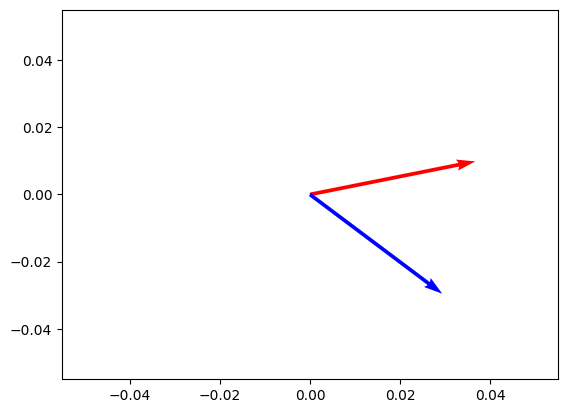

In [6]:
import matplotlib.pyplot as plt

vector_one = tf.constant([5, 1])
vector_two = tf.constant([4, -3])
V = np.array([vector_one, vector_two])

plt.quiver([0, 0], [0, 0], V[:,0], V[:,1], color=['r','b'], scale=15)
plt.show()

Two vectors are considered linearly dependent if:

1. You can multiply by a constant to go from one vector to another.  This is called a dilation.

Let's look at a picture:

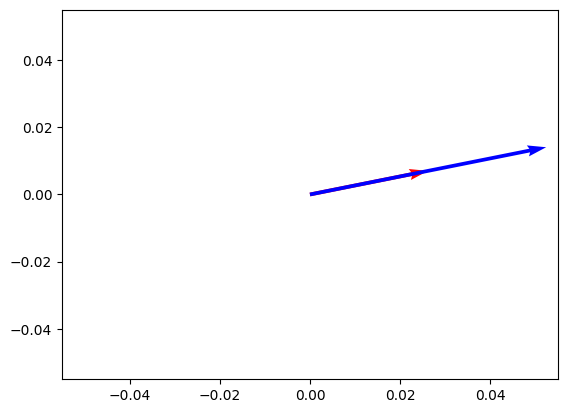

In [7]:
import matplotlib.pyplot as plt

vector_one = tf.constant([5, 1])
vector_two = vector_one * 2
V = np.array([vector_one, vector_two])

plt.quiver([0, 0], [0, 0], V[:,0], V[:,1], color=['r','b'], scale=21)
plt.show()

As you can see the two vectors "rest" on top of one another.  In other words, one vector completely captures the other vector.

A set of vectors are considered linearly dependent as well if:

2. You can add or subtract any two of them together times a scalar to produce another vector in the set.

Let's look at another example:

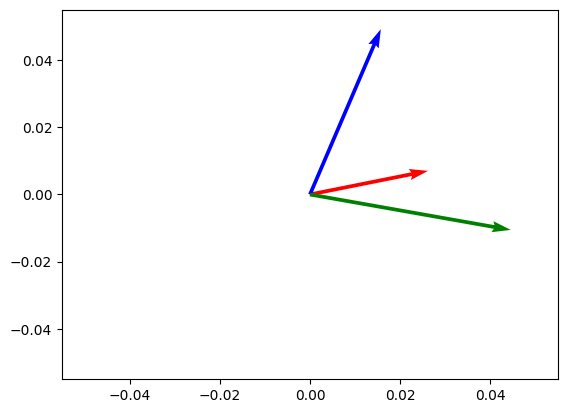

In [10]:
import matplotlib.pyplot as plt

vector_one = tf.constant([5.0, 1.0])
vector_two = tf.constant([3.0, 7.0])
vector_three = vector_one*2 - vector_two/2
V = np.array([vector_one, vector_two, vector_three])

plt.quiver([0, 0, 0], [0, 0, 0], V[:,0], V[:,1], color=['r','b', 'g'], scale=21)
plt.show()

Here our green vector is a "linear combination" of our first two vectors, so by definition, the set of all three vectors is linearly dependent.  This all may seem arbitrary to this point, put let's see what happens if our system of equations is not linearly independent and we try to solve it:

In [14]:
import pandas as pd

vector_one = tf.random.uniform([3], 0, 100)
vector_two = tf.random.uniform([3], 0, 100)
vector_three = tf.identity(vector_one)
matrix = tf.stack([vector_one, vector_two, vector_three], axis=1)
matrix_two = tf.random.uniform([3, 3], 0, 100)
vector = tf.random.uniform([3], 0, 100)

print(matrix.shape == matrix_two.shape)
print(row_reduce(matrix_two, vector))
type(matrix), type(matrix_two)
print(row_reduce(matrix, vector))

True
(<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-2.51863,  0.68794,  0.77175], dtype=float32)>)


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 3 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

We get an error when we try to do the row reduction!  This is because we fail to row reduce our matrix.  Let's verify this by looking at another example:

In [150]:
import numpy as np

vector_one = np.array([1, 2, 3])
vector_two = np.array([3, 4, 5])
vector_three = 3 * vector_one + 2 * vector_two
matrix = np.array([vector_one, vector_two, vector_three])
vector = np.array([5, 8, 9])
print("Start Matrix:")
print(matrix)
print()
print("Vector Start:")
print(vector)
print()
matrix[1, :] = matrix[0,:]*3 - matrix[1, :]
vector[1] = vector[0]*3 - vector[1]
print("R2->R1*3-R2")
print(matrix)
print()
print(vector)
print()
matrix[2, :] = matrix[0,:]*9 - matrix[2, :]
vector[2] = vector[0]*9 - vector[2]
print("R2->R1*9-R2")
print(matrix)
print()
print(vector)
print()
matrix[1, :] = matrix[1, :] * (0.5 * np.ones(3))
vector[1] *= 0.5
print("R2->R2*0.5")
print(matrix)
print()
print(vector)
print()
matrix[2, :] = matrix[1,:]*4 - matrix[2, :]
vector[2] = vector[1]*4 - vector[2]
print("R2->R1*9-R2")
print(matrix)
print()
print(vector)
print()

matrix[0, :] = matrix[1, :]*2 - matrix[0, :]
vector[0] = vector[1]*2 - vector[0]
print("R1->R1-R2*2")
print(matrix)
print()
print(vector)
print()
matrix[0, :] = matrix[0, :] * (-1 * np.ones(3))
vector[0] *= -1
print("R1->R1*-1, end matrix")
print(matrix)
print()
print(vector)

Start Matrix:
[[ 1  2  3]
 [ 3  4  5]
 [ 9 14 19]]

Vector Start:
[5 8 9]

R2->R1*3-R2
[[ 1  2  3]
 [ 0  2  4]
 [ 9 14 19]]

[5 7 9]

R2->R1*9-R2
[[1 2 3]
 [0 2 4]
 [0 4 8]]

[ 5  7 36]

R2->R2*0.5
[[1 2 3]
 [0 1 2]
 [0 4 8]]

[ 5  3 36]

R2->R1*9-R2
[[1 2 3]
 [0 1 2]
 [0 0 0]]

[  5   3 -24]

R1->R1-R2*2
[[-1  0  1]
 [ 0  1  2]
 [ 0  0  0]]

[  1   3 -24]

R1->R1*-1, end matrix
[[ 1  0 -1]
 [ 0  1  2]
 [ 0  0  0]]

[ -1   3 -24]


As you can see, this is the farest we can take this.  We can't row reduce the matrix any further because we've elminated the pivot the final row.  This is because vector three is a linear combination of vector one and vector two.  Therefore the columns aren't linearly independent.  

What we've seen so far generalizes to _any_ system of equations.  Additionally, any system of equations such that the number of rows and number of columns are unequal will not be row reducible, unless there are "extra" rows or columns that are linear combinations of a set of a "square" subset which are linearly independent.

To make this concrete consider this linear independent matrix:

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
$$

Now if we add the following vector:

$$
\begin{pmatrix}
 4 \\
 6 \\
\end{pmatrix}
$$

We get:

$$
\begin{pmatrix}
1 & 2 & 4\\
3 & 4 & 6\\
\end{pmatrix}
$$


Let's see what happens if we try to row reduce this matrix:

In [161]:
a = np.array([1, 2, 4])
b = np.array([3, 4, 6])

matrix = np.array([a, b])

print("Start Matrix:")
print(matrix)
print()
matrix[1, :] = matrix[0,:]*3 - matrix[1, :]
vector[1] = vector[0]*3 - vector[1]
print("R2->R1*3-R2")
print(matrix)
print()
matrix[1, :] = matrix[1, :] * (0.5 * np.ones(3))
vector[1] *= 0.5
print("R2->R2*0.5")
print(matrix)
print()
matrix[0, :] = matrix[1, :]*2 - matrix[0, :]
vector[0] = vector[1]*2 - vector[0]
print("R1->R1-R2*2")
print(matrix)
print()
matrix[0, :] = matrix[0, :] * (-1 * np.ones(3))
vector[0] *= -1
print("R1->R1*-1, end matrix")
print(matrix)
print()

Start Matrix:
[[1 2 4]
 [3 4 6]]

R2->R1*3-R2
[[1 2 4]
 [0 2 6]]

R2->R2*0.5
[[1 2 4]
 [0 1 3]]

R1->R1-R2*2
[[-1  0  2]
 [ 0  1  3]]

R1->R1*-1, end matrix
[[ 1  0 -2]
 [ 0  1  3]]



As you can see there is a 2 x 2 identity matrix embedded in this 2 x 3 matrix.  We can't row reduce any further than this, but clearly the third vector is surpurflous and doesn't contribute to us finding a unique solution.  In other words, any system of equations like this will have _infinitely_ many equations.  A unique solution for x and y.  But an infinite number of solutions for the z variable. 

## Invertability

It turns out that the uniqueness of solutions of systems of equations has a consequence, specifically that if a matrix has a unique solution and it's individual component vectors are linearly independent, then the matrix is invertable.  Consequentially, invertability is not a quality for all matrices and therefore you cannot always take an inverse.  

In order to find the inverse of the matrix we simply apply all the same steps to an identity matrix that we apply to the original matrix as we row reduce it.

In [184]:
def inverse_subtract_rows(matrix, inverse, row_index, pivot_index):
    row_one = matrix[row_index, :]
    row_two = matrix[pivot_index, :]
    inverse_row_one = inverse[row_index, :]
    inverse_row_two = inverse[pivot_index, :]
    value = row_one[pivot_index]
    matrix[row_index, :] = row_one - value*row_two
    inverse[row_index, :] = inverse_row_one - value*inverse_row_two
    return matrix, inverse
    
def inverse_invert_pivot(matrix, inverse, pivot_index):
    row = matrix[pivot_index, :]
    inverse_row = inverse[pivot_index, :]
    value = row[pivot_index]
    matrix[pivot_index, :] = row * multiply_row(row, 1/value)
    inverse[pivot_index, :] = inverse_row * multiply_row(inverse_row, 1/value)
    return matrix, inverse
    
def find_inverse(matrix):
    cur_index = 0
    inverse = np.identity(matrix.shape[1])
    while (matrix != get_identity(matrix)).any():
        if not is_pivot_one(matrix, cur_index):
            matrix, inverse = inverse_invert_pivot(matrix, inverse, cur_index)
            matrix = matrix.round(5)
        rows = list(range(matrix.shape[1]))
        rows.remove(cur_index)
        for row_index in rows:
            matrix, inverse = inverse_subtract_rows(
                matrix, inverse, row_index, cur_index
            )
            matrix = matrix.round(5)
        cur_index += 1
    return inverse

matrix = np.array([[1, 2], [3, 4]])
inverse = find_inverse(matrix)

matrix = np.array([[1, 2], [3, 4]])
matrix @ inverse

array([[1., 0.],
       [0., 1.]])

As you can see we were able to find the inverse by modifying the the row reduction code.  When you do a matrix mulitplication of the original matrix and it's inverse you get back the identity matrix, because this is the matrix equivalent of a "1".

Being able to invert a matrix is incredibly useful as we'll come to see for linear regression and other modeling techniques.



## Matrix Multiplication

Here we'll take a deeper look at matrix multiplication, specificially we'll consider the dot product.  The matrix multiplication we just did:

`matrix @ inverse` 


For each row in the left hand side matrix, carry out the dot product with the column on the right hand side.  Therefore this will only work if the number of columns on the left hand side equals the number of rows on the right hand side.  

Let's look at a quick example with two matrices:


$$
\
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
=
\begin{pmatrix}
7 & 10 \\
15 & 22 \\
\end{pmatrix}
\
$$

to get the top left cell of the resulting matrix, we do:

1(1) + 2(3) = 7

to get the top right cell of the resulting matrix, we do:

1(2) + 2(4) = 10

to get the bottom left cell of the resulting matrix, we do:

3(1) + 4(3) = 15

to get the bottom right cell of the resulting matrix, we do:

3(2) + 4(4) = 22

In general the algorithm for the ith row and jth column is:

$$ \sum_{k=1}^{n}a_{ik}b_{kj} $$

Note, we can also define the dot product for now vectors, simply by taking the transpose of the right hand side vector:


$$
\
\begin{pmatrix}
1 \\
3 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 2 \\
\end{pmatrix}
=
\begin{pmatrix}
7
\end{pmatrix}
\
$$


Notice, in this case the length of the two vectors must be equal, otherwise the dot product is not defined.

Because everything in linear algebra has both a geometric and algebriac interpretation we'll consider both of these when interpretting this new operator.


Let us consider the geometrix interpretation first:

$$ X \cdot Y = |X||Y|\cos\theta $$

Here $\theta$ is the angle between the two vectors.  

This formulation allows us to make the following statement:

If: 

$$ X \cdot Y = 0 $$

Then

$X$ is perpendicular to $Y$!


As for the algebriac interpretation:

In general, the dot product can be defined as the length of the projection of $X$ onto the unit vector in the direction of $Y$.  So we get a sense of the "magnitude" of X and Y by taking their dot product.


## Matrix as a Function

There won't be any real new concepts in this section, but we are going take a moment to notice some facts about matrices which will be valuable for how we think about them.  We treat a matrix in one of two ways:

1. As holding data
2. As "storing" transformations


The first representation of a matrix will probably be more familiar to most of you, if you've ever worked with excel, csvs or a database.  All of that data is stored as matrices.  

We've sort of been seeing this second representation throughout our discussion of linear algebra thus far.  Matrix multiplication is the major vehicle for applying our matrix.  If we consider the following example:


$$
\
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
3 & 3 \\
7 & 4 \\
\end{pmatrix}
\
$$

We can treat our first matrix:

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
$$

As our data matrix.  And our second matrix:

$$
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
$$

along with matrix multiplication as our function.  It transforms our input data and produces our resultant matrix:

$$
\begin{pmatrix}
3 & 3 \\
7 & 4 \\
\end{pmatrix}
$$


So we can sort of think of our second matrix as a function.  Where the matrix's values are the parameters to the function and the matrix plus the multiplication "is" the function.

A consequence of this way of thinking about matrices is that we can "combine" functions by applying matrix multiplication to individual matrices in order.


So for instance, say we had:

$$
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
$$

and 

$$
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
$$

If we do:

$$
\
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
-1 & -1 \\
\end{pmatrix}
\
$$

Then 

$$
\begin{pmatrix}
1 & 0 \\
-1 & -1 \\
\end{pmatrix}
$$


Is the same as first taking _any_ compatiable matrix and multiplying it first by:

$$
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
$$

And then by

$$
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
$$

Let's verify this:

In [17]:
import numpy as np

first_matrix = np.array([[1, 0], [0, -1]])
second_matrix = np.array([[1, 0], [1, 1]])
third_matrix =  second_matrix @ first_matrix 
random_matrix = matrix_two = np.random.rand(2, 2) * 100

first_intermediate_result = random_matrix @ second_matrix
second_intermediate_result = first_intermediate_result @ first_matrix 
(second_intermediate_result == random_matrix @ third_matrix).all()

True

Notice, the order in which the first and second matrix are combined matter!  So for instance, if we did this:

In [18]:
first_matrix = np.array([[1, 0], [0, -1]])
second_matrix = np.array([[1, 0], [1, 1]])
third_matrix =  first_matrix @ second_matrix 
random_matrix = matrix_two = np.random.rand(2, 2) * 100

first_intermediate_result = random_matrix @ second_matrix
second_intermediate_result = first_intermediate_result @ first_matrix 
(second_intermediate_result == random_matrix @ third_matrix).all()

False

All we did was switch the order of the matrix multiplication of the third_matrix.  This is because matrix multiplication is not commutative.  This means the order of the matrix multiplication will matter and in general, if we have two matrices, A and B then:

$$
AB \neq BA
$$

We've actually already used this fact.  The above was how we were able to arrive at the inverse of A given a row reduction scheme for A.  We applied each transform, storing the individual transforms in a matrix.  This necesary implies we can move in the other direction as well:

Going from one matrix to many "component" transformations.  The process of deducing these set of component transformations is called matrix decomposition.

## Determinants

The determinant of a matrix is a very helpful tool for understanding how a transformation matrix "acts" on a data matrix.

The determinant conveys two pieces of information:

1. the magnitude of the transform
2. whether the transform preserves or reverses orientation

This allows us to tell ahead of time how our matrix will transform other matrices and what we can expect as a result.  Computing determinants is easy with numpy, let's look at the detminerant of our "third_matrix" from the last example:

In [19]:
np.linalg.det(third_matrix)

-1.0

Now let's compare this with our other two matrices:

In [20]:
np.linalg.det(first_matrix), np.linalg.det(second_matrix)

(-1.0, 1.0)

As you can see, we get the magnitude from the first matrix and second matrix and we get the orientation change from the first matrix.  As should be clear, the determinant is a "lossy" measure, because we represent a matrix as a scalar.  However, there is still power in looking at representations like this.  We can assess the individual effects of component transformations.  And then see how their combined effects will augment and orient other matrices.